<a href="https://colab.research.google.com/github/HappyGithub-dev/Wine-Data-Analysis/blob/main/Wine_Quality_Analysis_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

print("Setup Complete")

Setup Complete


In [ ]:
wine_data = pd.read_csv('/content/winequality-red.csv', sep=';')
wine_data = wine_data.reset_index()
wine_data.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(wine_data.shape)

(1599, 13)


In [ ]:
print(wine_data.columns)

Index(['index', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [ ]:
wine_data['fixed acidity'].describe()

,fixed acidity
count,1599.000000
mean,8.319637
std,1.741096
min,4.600000
25%,7.100000
50%,7.900000
75%,9.200000
max,15.900000


In [ ]:
wine_data['volatile acidity'].describe()

,volatile acidity
count,1599.000000
mean,0.527821
std,0.179060
min,0.120000
25%,0.390000
50%,0.520000
75%,0.640000
max,1.580000


In [ ]:
nan_counts = wine_data.isnull().sum()
print(nan_counts[nan_counts>0])

Series([], dtype: int64)


In [ ]:
corr_mat = wine_data.corr()
corr_mat['quality']

,quality
index,0.066453
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731


Good Parameters - Fixed Acidity , Volatile Acidity , Citric Acid , Chlorides , Total Sulphur Dioxide , Density , Sulphates , Alcohol

Bad Parameters - Residual Sugar , Free Sulphur Dioxide , pH



<Axes: >

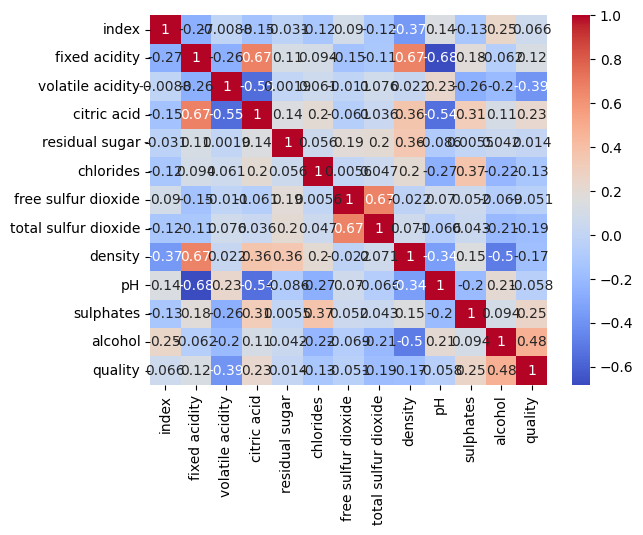

In [ ]:
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')

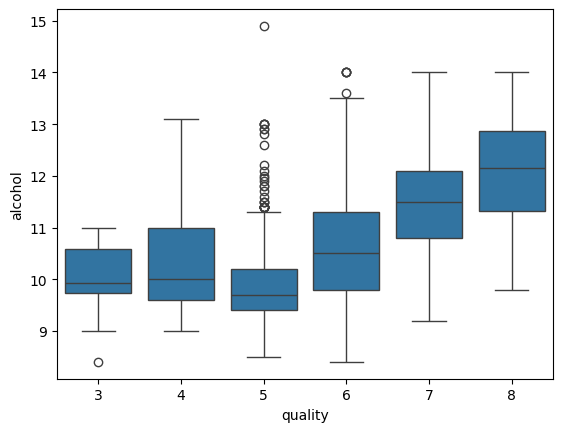

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='alcohol')
plt.savefig('quality_vs_alcohol_boxplot.png')

Higher Alcohol content is leading to a better wine quality

Median Alcohol content is also rising


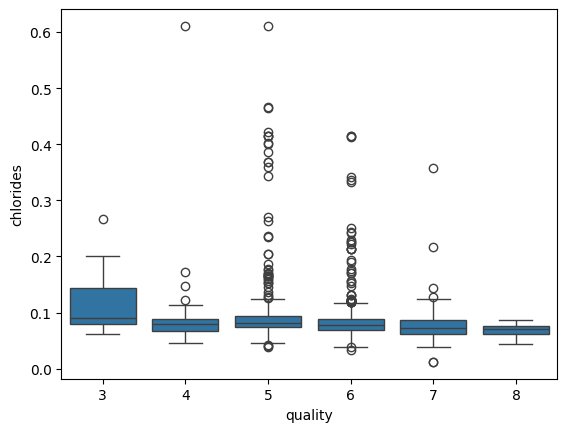

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='chlorides')
plt.savefig('quality_vs_chlorides_boxplot.png')

Median Chloride quantity is quite uniform



In [ ]:
chlorides_quality_mean = wine_data.groupby('quality')['chlorides'].mean()
print("Mean chloride content for each wine quality:")
print(chlorides_quality_mean)

Mean chloride content for each wine quality:
quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64


Chloride content is decreasing as the quality is increasing

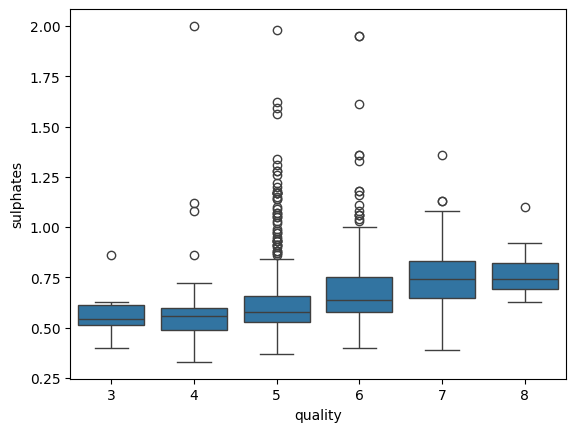

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='sulphates')
plt.savefig('quality_vs_sulphates_boxplot.png')

There is a clear increasing trend here

The wine quality dependes on sulphate

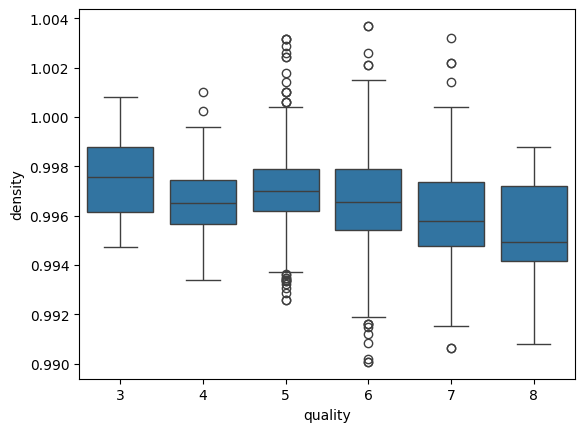

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='density')
plt.savefig('quality_vs_density_boxplot.png')

In [ ]:
print(wine_data['quality'].corr(wine_data['density']))

-0.17491922778334887


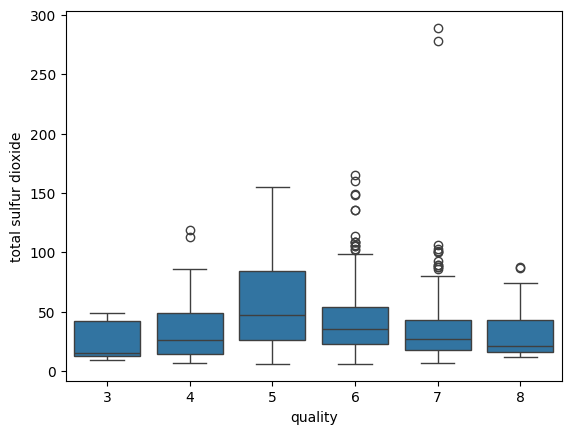

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='total sulfur dioxide')
plt.savefig('quality_vs_total_so2_boxplot.png')

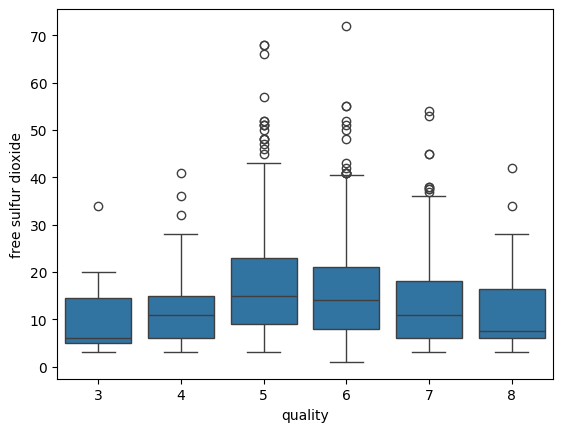

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='free sulfur dioxide')
plt.savefig('quality_vs_free_so2_boxplot.png')

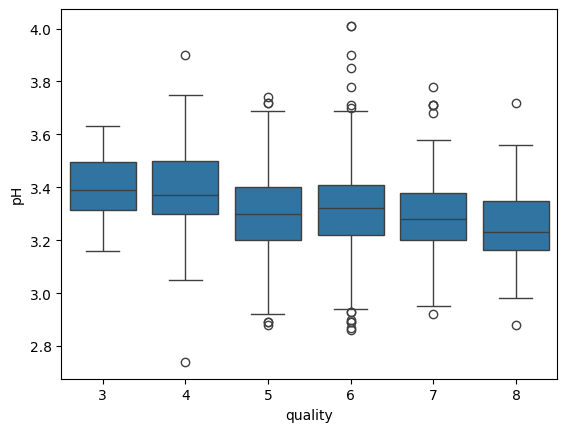

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='pH')
plt.savefig('quality_vs_pH_boxplot.png')

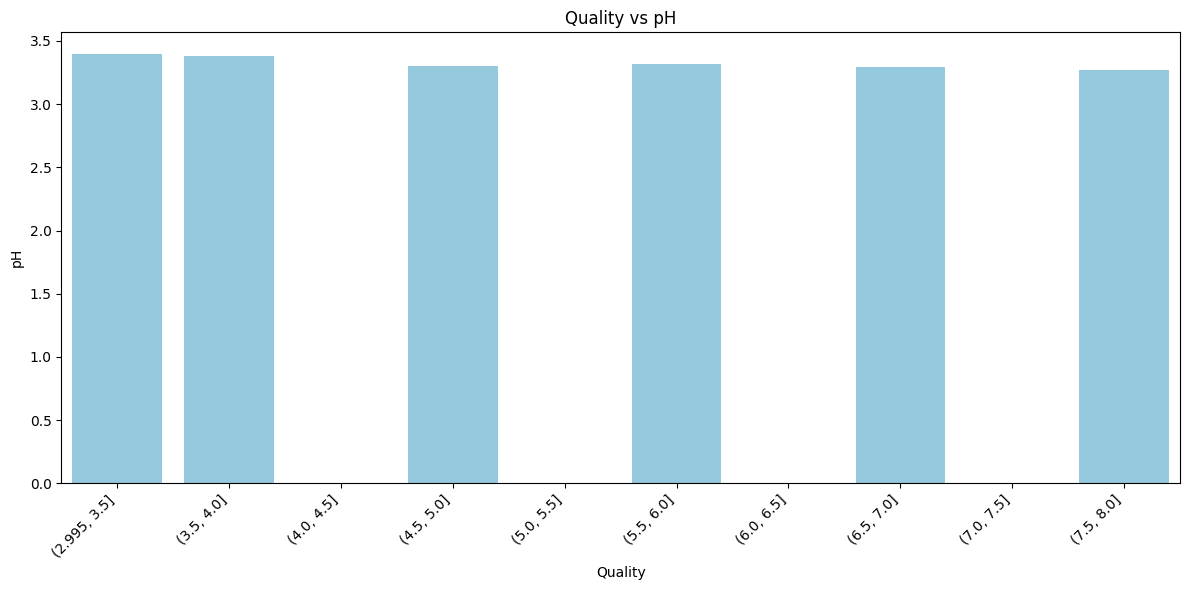

In [ ]:
pH_bins = pd.cut(wine_data['quality'], bins=10)

churn_by_pH_range = wine_data.groupby(pH_bins)['pH'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='quality', y='pH', data=churn_by_pH_range, color='skyblue')
plt.title('Quality vs pH')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

this seems to decreasing , althout very weekly liearly

can be considered

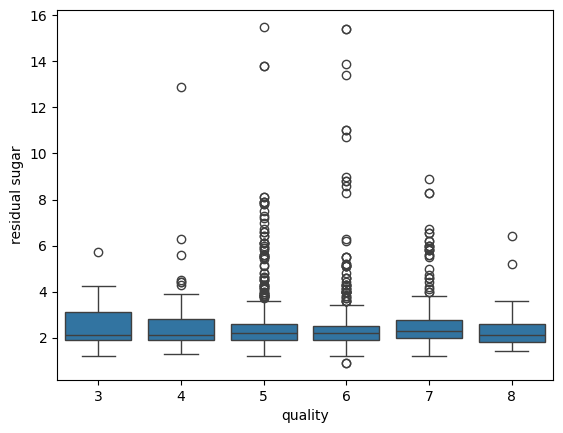

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='residual sugar')
plt.savefig('quality_vs_residual_sugar_boxplot.png')

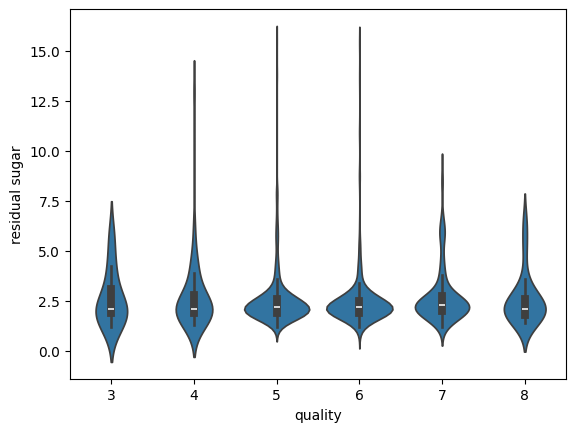

In [ ]:
sns.violinplot(data=wine_data, x='quality', y='residual sugar')
plt.savefig('quality_vs_residual_sugar_violinplot.png')

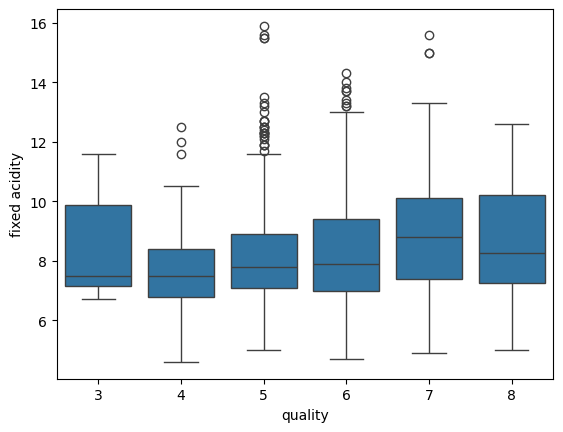

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='fixed acidity')
plt.savefig('quality_vs_fixed_acidity_boxplot.png')

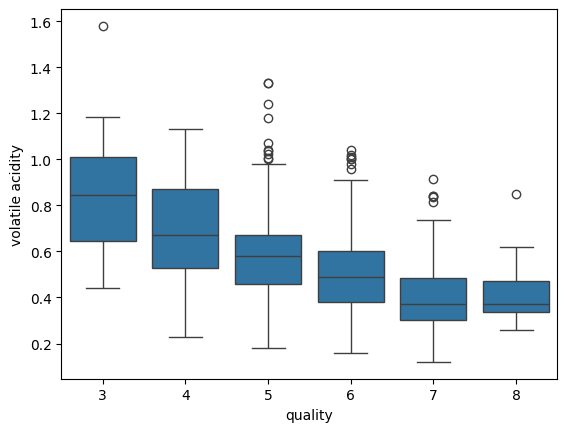

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='volatile acidity')
plt.savefig('quality_vs_volatile_acidity_boxplot.png')

decreasing parameter


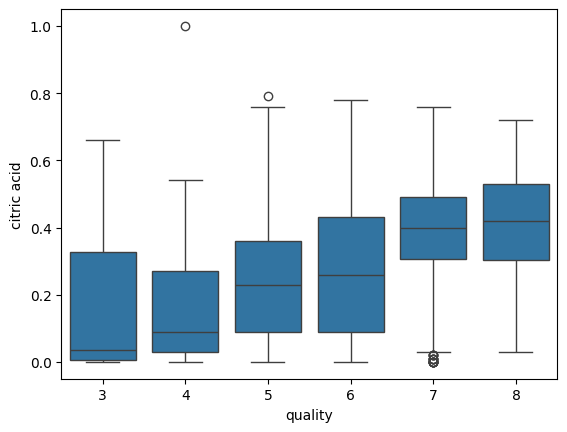

In [ ]:
sns.boxplot(data=wine_data, x='quality', y='citric acid')
plt.savefig('quality_vs_citric_acid_boxplot.png')

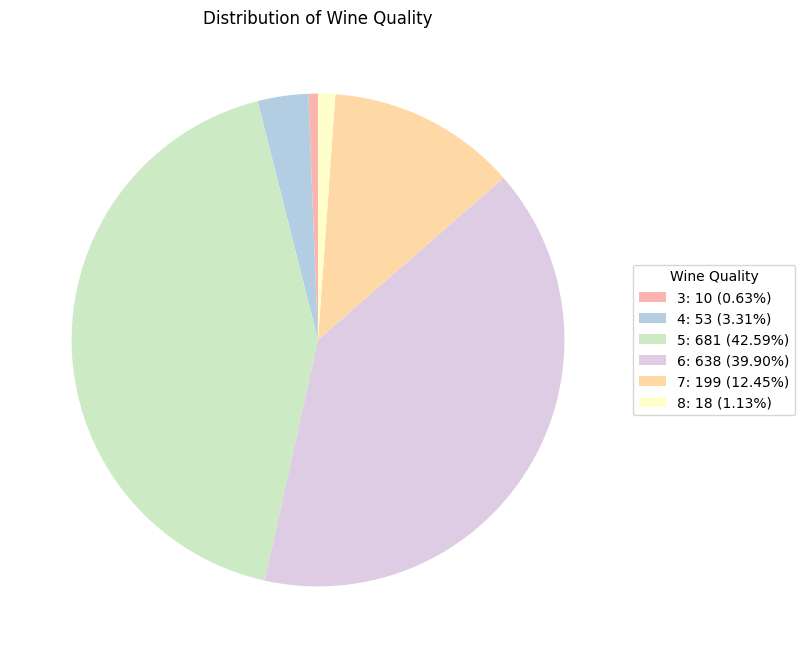

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


quality_counts = wine_data['quality'].value_counts().sort_index()


total = quality_counts.sum()
percentages = (quality_counts / total) * 100


legend_labels = [f'{quality}: {count} ({percentage:.2f}%)' for quality, count, percentage in zip(quality_counts.index, quality_counts.values, percentages)]


plt.figure(figsize=(10, 8))
plt.pie(
    quality_counts,
    labels=None,
    autopct='',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
)
plt.title('Distribution of Wine Quality')
plt.legend(legend_labels, title="Wine Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig('wine_quality_pie_chart.png', dpi=300)
plt.show()